<b>КОММЕНТАРИЙ РЕВЬЮВЕРА</b>

Привет, Алла👋!)

Меня зовут Обидин Андрей, я осуществлял проверку проекта. Может перейдем сразу на <b>ты</b>? Если это неприемлемо, то обязательно дай знать)

Благодарю тебя за то, что вовремя всё сдала и хорошо поработала!)

`Алла, ты хорошо выполнила проект, но есть некоторые моменты на корректировку, я думаю ты справишься! Не забудь актуализировать свои выводы`

Далее по ходу работы ты сможешь встретить мои комментарии, они будут отмечены разными цветами:

<div class="alert alert-block alert-success">
Похвала и возможности развития
</div>
<div class="alert alert-block alert-warning">
Некритичные замечания, но стоит обратить внимание
</div>
<div class="alert alert-block alert-danger">
Грубая ошибка, необходимо исправить
</div>


Заранее прошу не удалять мои комментарии, это важно. Если у тебя возникнут вопросы, обозначь их, я с радостью тебе помогу!)

Как вариант, можешь обозначить их так:
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
</div>

# Задача 

Кому: интернет-магазин «Стримчик» \
Дата выполнения: декабрь 2016 г. \
Используемые данные: из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). \
Задача: выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

***ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Общая информация

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

In [6]:
df = pd.read_csv('./datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Смотрим таблицу с данными: 11 столбцов, есть пропуски. Нужно привести к нижнему регистру столбцы таблицы и названия колонок.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


типа данных Year of Release и Critic_Score - float нужно заменить на целые, User_Score - object нужно заменить на float. Когда поменять тип данных у user_scoreб выдал ошибку с tbd (to be determined, to be done). Вероятно, данные были не заполнены, но отмечены, что будут. Заменим tbd на Nan.

In [8]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.400981
User_Count         0.546025
Developer          0.396136
Rating             0.404869
dtype: float64

In [9]:
df.duplicated().sum() 

0

Много пропущенных значений в столбцах rating и user_score (по 40%), также critic_score(51%). Немного пропусков по наименованиям, name, (можем удалить эти строки) и немного по  year_of_release.
Дубликатов не имеется.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Хороший обзор

</div>

## Подготовка данных 

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

In [11]:
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()

Исправим названия столбцов и наименования внутри них на буквы нижнего регистра. 

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

Заменим на пропуски tbd в user_score

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Отличная идея заменить tbd --> nan, как вариант ты мог сделать это через `to_numeric(errors = 'coerce')`

Более подробно тут: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

</div>

In [13]:
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

<ipython-input-13-53e418ea5538>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()


Год выпуска заменяем на год по названию игры. 

In [14]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.008733
genre              0.000120
publisher          0.003230
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
global_sales       0.000000
critic_score       0.513308
critic_count       0.513308
user_score         0.546025
user_count         0.546025
developer          0.396136
rating             0.404869
dtype: float64

Проверяем, сколько пропусков осталось у года выпуска-  меньше 1%, оставим как есть. Там где пропуски составляют более 40% - будет нелогично менять на медиану или минимальные значения, например. Пока оставим как есть.

In [15]:
df = df.dropna(subset = ['name'])

незначительные пропуски с названиями - удалим все строки. 

In [16]:
df['year_of_release'] = df['year_of_release'].astype('Int64')


In [17]:
df['critic_score'] = df['critic_score'].astype('Int64')


In [18]:
df['user_score'] = df['user_score'].astype('Float64')

Типы данных заменили. 

In [19]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    

Хорошая обработка

</div>

## Исследовательский анализ данных 

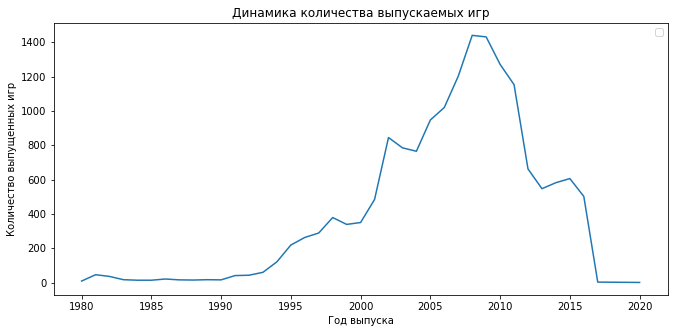

In [20]:
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(11,5))
sns.lineplot(data=games_by_year)
plt.title("Динамика количества выпускаемых игр")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

Построим диаграмму по динамике выпускаемых игр в разные годы. Пик выпуска игр пришелся на период 2005-2010 гг. До 1995 года выпускаемых игр было стабильно немного. 

In [21]:
df_1995 = df[df['year_of_release']>=1995]

In [22]:
platform_leaders = df_1995.groupby('platform')['all_sales'].sum().sort_values()[-5:].index.tolist()

In [23]:
data = []

for platform in platform_leaders:
    data.append(
        go.Bar(x=df_1995[df_1995.platform==platform].groupby('year_of_release')['all_sales'].sum().index,
               y=df_1995[df_1995.platform==platform].groupby('year_of_release')['all_sales'].sum(),
               name=platform,
               )
    )
layout = {'title': 'Продажи топ-5 платформ по годам'}
    
fig = go.Figure(data=data, layout=layout)
fig.show()

NameError: name 'go' is not defined

На диаграмме пяти топовых по продажам платформ за время после 1995 года видим, что со временем общие продажи стали падать, но и количество платформ увеличилось: с 2006 года все пять платформ продаются одновременно. А динамика "цикла продаж" - то есть появление и исчезания платформ - примерно одинакова, около 10 лет: 
- PS2 с 2000 по 2010 (в точности 10 лет)
- DS с 2004 по 2013 (9 лет)
- X360 с 2005 по 2015 (10 лет)
- Wii 2006 - 2015 (9 лет)
- PS3 2006 - 2016 (10 лет). 

2013 год определяет новый этап роста одних платформ и падения других, поэтому выберем его как актуальный.  

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    

Как видим, лидеры уже потеряли свои позиции на рынке, т.е. ставку на них делать нельзя

</div>

In [26]:
df= df[df['year_of_release']>=2013]
df.head(5)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,all_sales
16,grand theft auto v,ps3,2013,action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50.0,8.2,3994.0,Rockstar North,m,21.05
23,grand theft auto v,x360,2013,action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97,58.0,8.1,3711.0,Rockstar North,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,Activision,6.03,5.86,0.36,2.38,14.63,<NA>,NaN,NaN,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,Nintendo,5.28,4.19,4.35,0.78,14.60,<NA>,NaN,NaN,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97,66.0,8.3,2899.0,Rockstar North,m,12.62


<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    


Мне все же кажется, что актуальный период нужно подрезать, посмотри на график ниже, там отчетливо видна граница на 2013 году
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА: ага поправила! </b>
</div>

Определим актуальный период как тот, когда видим последний слом на падение одних платформ и рост других (с 2013 года). Возьмем датасет только начиная с этого периода. 

In [28]:
data = []

for platform in df['platform'].unique():
    data.append(
        go.Scatter(x=df[df.platform==platform].groupby("year_of_release")['all_sales'].sum().index,
               y=df[df.platform==platform].groupby("year_of_release")['all_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Продажи по платформам с 2013 г.'}
    
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)
plt.show()

NameError: name 'go' is not defined

Для того, чтобы оценить какие платформы лидируют по продажам, растут или падают, и выбрать несколько потенциально прибыльных платформ - построим график по продажам в динамике, по годам. Общая динамика после 2012 года - падение. Некоторый рост показывали "молодые" платформы в 2015 г.:ps4, xone, 3dc, pc, wiiu. 

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    

Я бы еще пк добавил

</div>

In [29]:
data = []

for platform in df['platform'].unique():
    data.append(
        go.Box(y=df[df.platform==platform]['all_sales'], 
               name=platform )
    )
    
layout = {'title': 'Глобальные продажи игр в разбивке по платформам'}
fig = go.Figure(data=data, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1.5]))

iplot(fig, show_link = False)

NameError: name 'go' is not defined

Представлен "ящик с усами" по глобальным продажам игр в разбивке по платформам. Лидерами оказались x360, ps4, xone, wiiu, wii

In [30]:
Xbox_360 = df[df['platform']=='x360']
Xbox_360[['all_sales', 'critic_score', 'user_score']].corr()


,all_sales,critic_score,user_score
all_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


Посмотрим корреляцию продаж внутри одной популярной платформы с отзывами пользователей и критиков. Оценка критиков показывает бОльшую взаимосвязь с продажами, чем оценка пользователей, связь с которыми тем не менее также обнаруживается. 

In [31]:
filtered_df = df[df[['critic_score', 'user_score']].notnull().all(1)]

filtered_df


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,all_sales
16,grand theft auto v,ps3,2013,action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50.0,8.2,3994.0,Rockstar North,m,21.05
23,grand theft auto v,x360,2013,action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97,58.0,8.1,3711.0,Rockstar North,m,16.27
42,grand theft auto v,ps4,2014,action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97,66.0,8.3,2899.0,Rockstar North,m,12.62
60,call of duty: ghosts,x360,2013,shooter,Activision,6.73,2.56,0.04,0.91,10.25,73,29.0,2.6,2117.0,Infinity Ward,m,10.24
69,call of duty: ghosts,ps3,2013,shooter,Activision,4.10,3.63,0.38,1.25,9.36,71,10.0,2.6,1047.0,Infinity Ward,m,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,saints row: gat out of hell,xone,2015,action,Deep Silver,0.00,0.01,0.00,0.00,0.01,65,16.0,6.0,27.0,Volition Inc.,m,0.01
16634,sébastien loeb rally evo,xone,2016,racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,63,8.0,8.2,22.0,Milestone S.r.l,e,0.01
16656,fast racing neo,wiiu,2016,action,Nintendo,0.00,0.01,0.00,0.00,0.01,81,46.0,8.5,151.0,Shin'en,e,0.01
16664,prison architect,xone,2016,action,Introversion Software,0.01,0.00,0.00,0.00,0.01,74,13.0,6.7,7.0,"Introversion, Double Eleven",NaN,0.01


Теперь попробуем рассмотреть базу только с указанными значениями, без пропущенных. 

In [32]:
Xbox_360 = filtered_df[filtered_df['platform']=='x360']
Xbox_360[['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.350345,-0.006238
critic_score,0.350345,1.000000,0.520946
user_score,-0.006238,0.520946,1.000000


Корреляция получается такая же, поэтому пропущенные значения не влияют. 

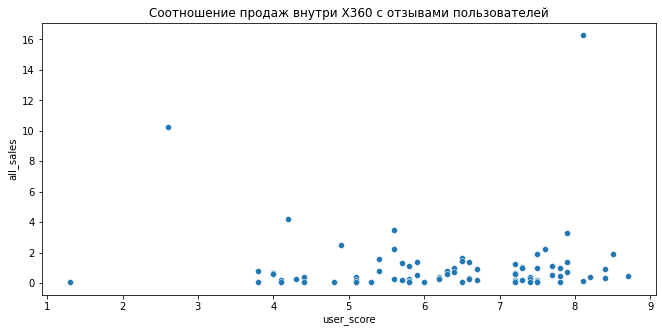

In [33]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='user_score', y='all_sales', data=Xbox_360)
plt.title('Cоотношение продаж внутри X360 с отзывами пользователей')
plt.show()

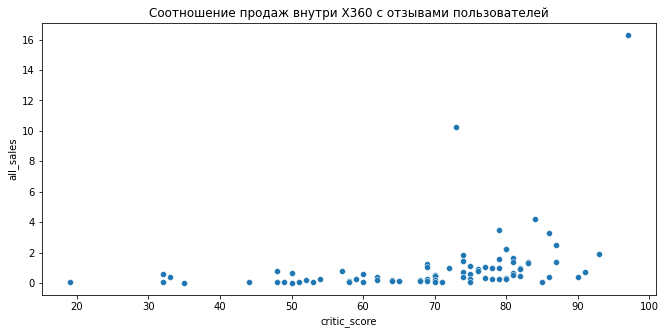

In [34]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='critic_score', y='all_sales', data=Xbox_360)
plt.title('Cоотношение продаж внутри X360 с отзывами пользователей')
plt.show()

Смотрим диаграмму рассеяния: демонстрируется выявленная корреляционная связь. Чем выше оценки пользователей, и особенно критиков - тем выше продажи. 

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Корреляция с критиками действительно выше, чем с пользователями

</div>

In [46]:
top_5 = ['ps4','xone','pc','wiiu','3ds']
top_5_platforms = df[df['platform'].isin(top_5)]

# top_5_platforms.head(10)
# df.head(5)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,all_sales
16,grand theft auto v,ps3,2013,action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50.0,8.2,3994.0,Rockstar North,m,21.05
23,grand theft auto v,x360,2013,action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97,58.0,8.1,3711.0,Rockstar North,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,Activision,6.03,5.86,0.36,2.38,14.63,<NA>,NaN,NaN,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,Nintendo,5.28,4.19,4.35,0.78,14.60,<NA>,NaN,NaN,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97,66.0,8.3,2899.0,Rockstar North,m,12.62


In [85]:
def other_platform(name_of_platform):
    platform = df[df['platform']==name_of_platform]
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='all_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='all_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['all_sales'])
    # Судя по всему, функция "corr()" ожидает что она должна быть вызвана для столбца с типом
    # float, в то время как столбец 'critic_score' имеет тип 'int'. Однако я не нашёл в документации
    # явного подтверждения данному предоположению
    critic_correl = platform['critic_score'].astype(float).corr(platform['all_sales'])

    def corr_to_str(corr):
        suffix = " обратная" if corr < 0 else ""
        corr = abs(corr)
        if corr < 0.1:
            return "Отсутствует"
        elif corr <= 0.3:
            return "Слабая" + suffix
        elif corr <= 0.5:
            return "Умеренная" + suffix
        elif corr <= 0.7:
            return "Высокая" + suffix
        elif corr <= 0.9:
            return "Весьма высокая" + suffix
        else:
            return "Сильная" + suffix
    
    print('Корреляция между отзывами критиков и игровой платформой',
          name_of_platform.upper(), ':', corr_to_str(critic_correl), critic_correl)
    print('Корреляция между отзывами пользователей и продажами ',
          name_of_platform.upper(), ':', corr_to_str(correl), correl)

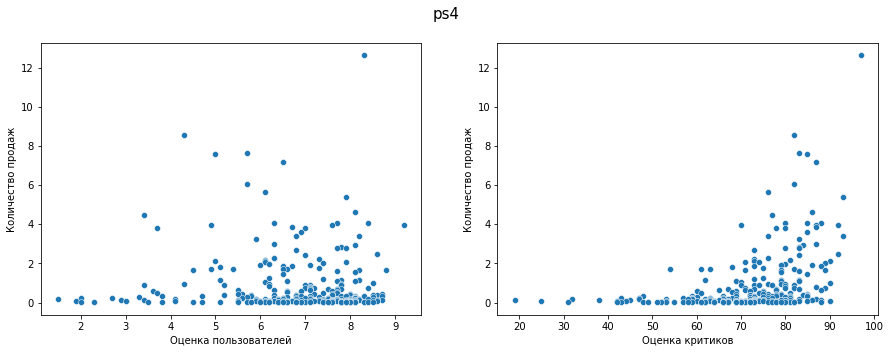

Корреляция между отзывами критиков и игровой платформой PS4 : Умеренная 0.40656790206178123
Корреляция между отзывами пользователей и продажами  PS4 : Отсутствует -0.03195711020455644


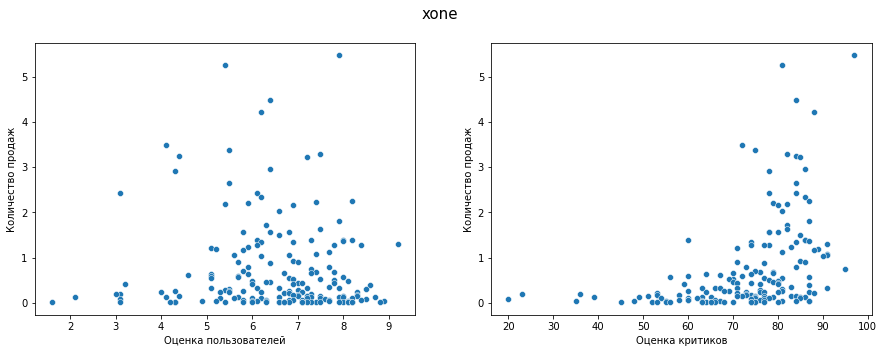

Корреляция между отзывами критиков и игровой платформой XONE : Умеренная 0.41699832800840153
Корреляция между отзывами пользователей и продажами  XONE : Отсутствует -0.06892505328279418


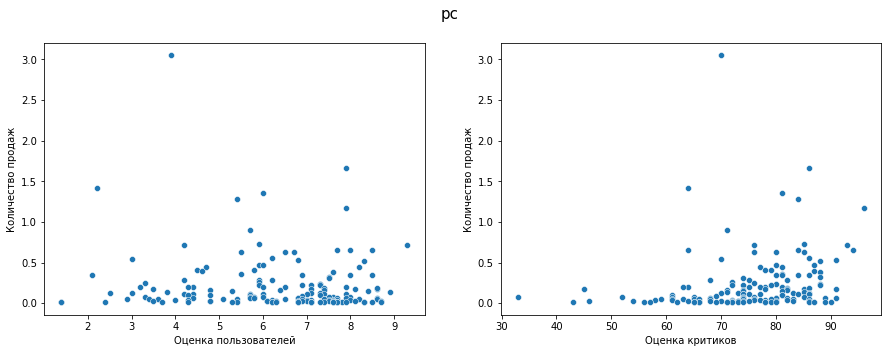

Корреляция между отзывами критиков и игровой платформой PC : Слабая 0.19965984836380174
Корреляция между отзывами пользователей и продажами  PC : Отсутствует -0.08999775678448749


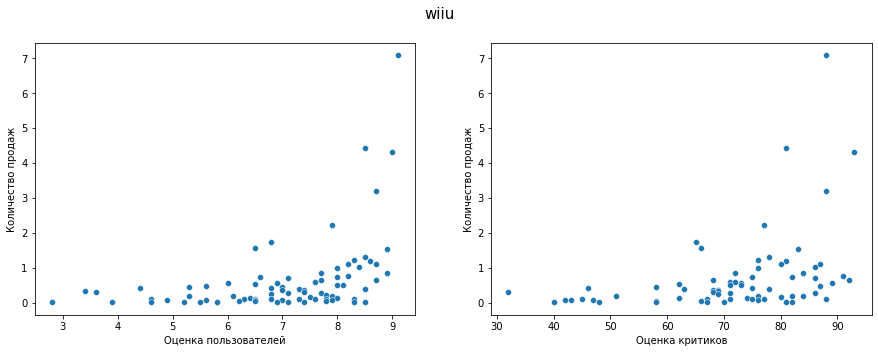

Корреляция между отзывами критиков и игровой платформой WIIU : Умеренная 0.37641490654239124
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.41933048192661854


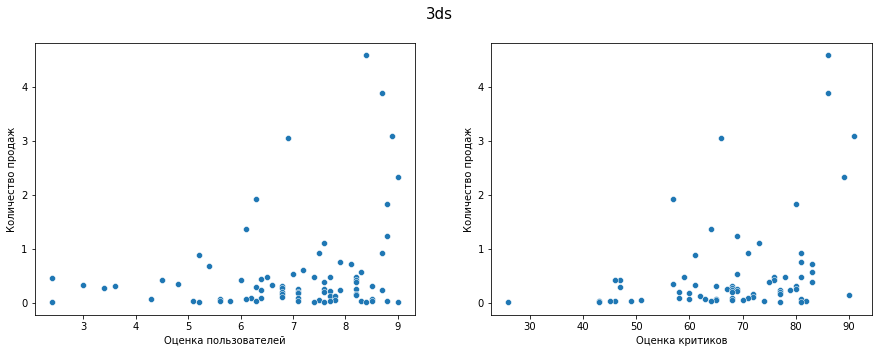

Корреляция между отзывами критиков и игровой платформой 3DS : Умеренная 0.3570566142288104
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.24150411773563005


In [87]:
platform_leaders = df.groupby('platform')['all_sales'].sum().sort_values()[-5:].index.tolist()

for platform in top_5:
    other_platform(platform)


In [31]:

platform_leaders = df_1995.groupby('platform')['all_sales'].sum().sort_values()[-5:].index.tolist()

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    


Советую еще посмотреть корреляцию, не ограничиваясь конкретной платформой, так ты сможешь увидеть общий тренд
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
</div>

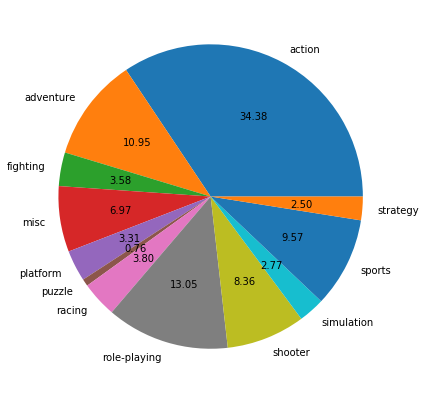

In [32]:
x=df.groupby("genre")['genre'].count()
genres = x.index
plt.figure(figsize=(20,7))
plt.pie(x=x, labels=genres, autopct="%.2f")
plt.show()


В общем распределении игр по жанрам больше всего экшн (боевиков), спортивных, misc и приключений.

In [33]:
game_genres = df.pivot_table(
    index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
game_genres = game_genres.reset_index().rename_axis(None, axis=1)
game_genres

,genre,all_sales
0,action,322.50
1,shooter,232.98
2,sports,150.65
3,role-playing,145.89
4,misc,63.06
5,platform,42.63
6,racing,39.89
7,fighting,35.31
8,adventure,23.64
9,simulation,21.76


В распределении по продажам самые популярные -  экшн, спортивные и стрелялки. 

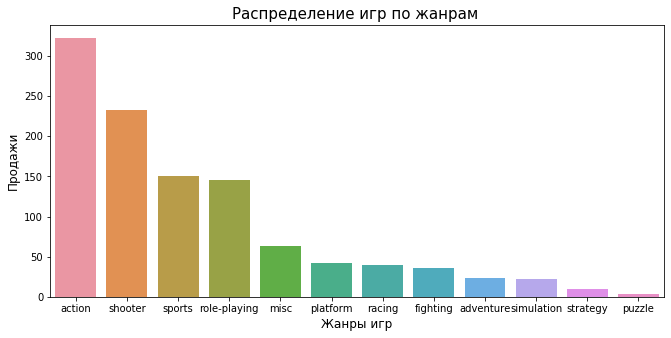

In [34]:
plt.figure(figsize=(11,5))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=game_genres, x='genre', y='all_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

В сравнении двух распределений обращает на себя внимание то, что приключения не столь успешны в продажах, как их доля в общем составе. Еще менее низкие продажу у жанров пазла и стратегии (более спокойные игры). Вероятно, основной запрос по играм - возможность эмоционально "отключиться" от реальности, поэтому боевики и спорт пользуются большей популярностью. 

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    

Молодец, что посмотрела количество и сумму, но можно еще посмотреть среднее
</div>

## Портрет пользователя каждого региона

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    

Классные подходы к анализу регионов, но когда ты ограничишь актуальный период, то портреты изменятся

</div>

In [35]:
traces = []
for region in ["na", "eu", "jp"]:
    traces.append(
        go.Scatter(
            x=df.groupby('platform')[region+'_sales'].sum().sort_values()[-5:].index.tolist(), 
            y=df.groupby('platform')[region+'_sales'].sum().sort_values()[-5:],
            name = region, 
            visible = (region == 'na'))
    )
    
layout = go.Layout(
    title="Продажи платформ по регионам",
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*3],
                    label='NA',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='EU',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='JP',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

Самые популярные платформы различны в разных регионах: В NA топ- платформа ps4 (больше всего продаж), в Европе - PS3 (второй по уровню продаж), в Японии - DS (третий по уровню продаж). 

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Очень крутой график!!!!

</div>

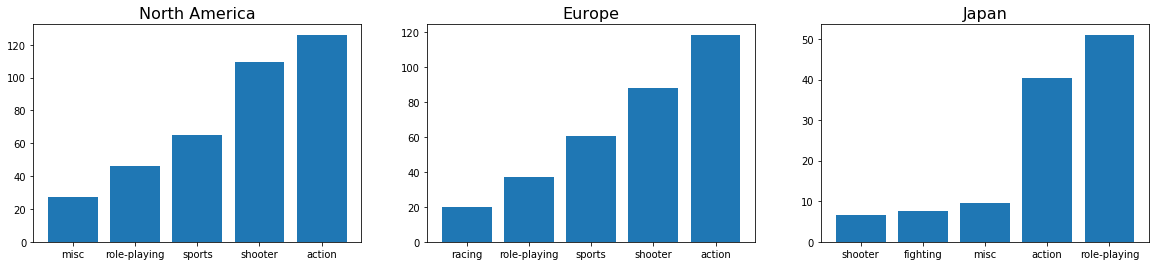

In [36]:

NA_index = df.groupby('genre')['na_sales'].sum().sort_values()[-5:].index.tolist()
NA_values = df.groupby('genre')['na_sales'].sum().sort_values()[-5:]

EU_index = df.groupby('genre')['eu_sales'].sum().sort_values()[-5:].index.tolist()
EU_values = df.groupby('genre')['eu_sales'].sum().sort_values()[-5:]

JP_index = df.groupby('genre')['jp_sales'].sum().sort_values()[-5:].index.tolist()
JP_values = df.groupby('genre')['jp_sales'].sum().sort_values()[-5:]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

ax1.bar(NA_index, NA_values)
ax1.set_title('North America', fontsize=16)

ax2.bar(EU_index, EU_values)
ax2.set_title('Europe', fontsize=16)

ax3.bar(JP_index, JP_values)
ax3.set_title('Japan', fontsize=16)

plt.show()

Посмотрим распределение популярных жанров в разных странах. В Сев.Америке и Европе очень схожи топ-5 жанров, а Япония более отлична (видимо, в силу разницы культур). Если в Сев.Америке и Европе лидеры - экшн, спорт и стрельба, то в Японии на первом месте ролевые игры, а потом уже экшн. 

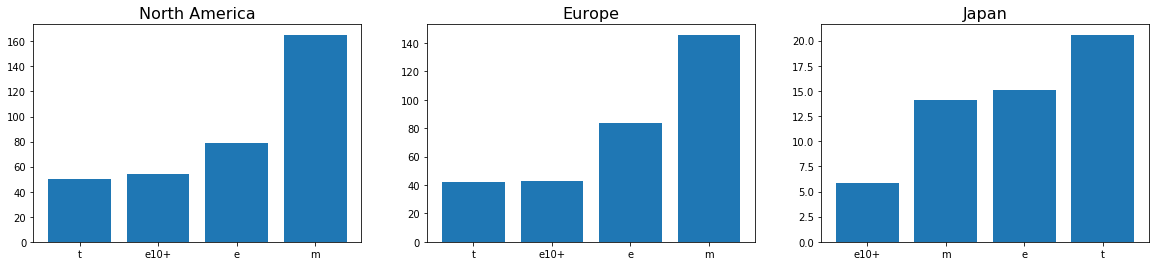

In [37]:
NA_index = df.groupby('rating')['na_sales'].sum().sort_values()[-5:].index.tolist()
NA_values = df.groupby('rating')['na_sales'].sum().sort_values()[-5:]

EU_index = df.groupby('rating')['eu_sales'].sum().sort_values()[-5:].index.tolist()
EU_values = df.groupby('rating')['eu_sales'].sum().sort_values()[-5:]

JP_index = df.groupby('rating')['jp_sales'].sum().sort_values()[-5:].index.tolist()
JP_values = df.groupby('rating')['jp_sales'].sum().sort_values()[-5:]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

ax1.bar(NA_index, NA_values)
ax1.set_title('North America', fontsize=16)

ax2.bar(EU_index, EU_values)
ax2.set_title('Europe', fontsize=16)

ax3.bar(JP_index, JP_values)
ax3.set_title('Japan', fontsize=16)

plt.show()

Во всех регионах лидируют игры с рейтингом e -для всех. 
В Европе и Сев.Америке далее идут взрослые, а в Японии - подростки.


## Проверка гипотез

### Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; \
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [38]:
xone_hyp = df[(df['platform']=='xone') & (df['year_of_release']>2006)]['user_score']
pc_hyp = df[(df['platform']=='pc') & (df['year_of_release']>2006)]['user_score']

xone_hyp.mean()

6.521428571428572

In [39]:
pc_hyp.mean()

6.280379746835442

Средний рейтинг пользователя для xbox платформ 6.5, пользователя для PC платформ-6.8

In [40]:
alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


Значение p-value равно 3,7%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 3.7% можно получить разные пользовательских рейтинги платформ

### Сформулируем гипотезы по жанрам:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые; \
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [41]:
genre_action_hyp = df[(df['genre']=='action') & (df['year_of_release']>2006)]['user_score']
genre_sports_hyp = df[(df['genre']=='sports') & (df['year_of_release']>2006)]['user_score']

genre_action_hyp.mean()

6.8374999999999995

In [42]:
genre_sports_hyp.mean()

5.238124999999999

Средний рейтинг пользователя жанра экшн 5.8,жанра спорт -6.3

In [43]:
alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинаковые средние рейнтинги по жанрам action и sports.

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    

Попробуй поднять год релиза и думаю ты станешь более уверенной в показателях
</div>

## Общий вывод 

В данной работе были обработаны данные, приведены к правильным данным столбцы, к нижнему регистру таблицы и названия колонок, типы даных в столбцах приведены в соответствие, tbd заменены на nan для проведения дальнейшего анализа.
Выявлено, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с после 1994г с пиком продаж в 2005-2010 гг., после чего продажи пошли на спад.
После 1995 года самые популярные платформы: PS2, X360, PS3, WII, DS, PS.
Средняя продолжительность жизни игровой приставки составляет около 10 лет, с пиком продаж примерно через 5 лет после выпуска. 

Оценки критиков и пользователей взаимосвязаны с продажами самих игр: чем выше оценка критиков или пользователей, тем лучше продажа игры (в особенности критиков). 
Самый популярный жанр за все время это Экшн. На последнем месте стратегии.

Региональные различия:  в Северной америке и Европе самые популярные жанры -action, sports, shooter. А жанры игры в Японии начинаются с ролевых: Role-playing, action и sports.
Самые популярные платформы различны в разных регионах: В NA топ- платформа X360 (больше всего продаж), в Европе - PS3 (второй по уровню продаж), в Японии - DS (третий по уровню продаж). 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не подтвердилась.
Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась!.

Рекомендации по продажам: есть потенциал у платформы Sony Playstation 4. Жанры выбирать между экшн, стрельбой, спортом и родево игрой. Учитывать региональные различия в целевой аудитории и ее предпочтениях. 

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    

`Алла, ты хорошо выполнила проект, но есть моменты на небольшую правку, некоторые твои выводы немного изменятся`

</div>